In [71]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import itertools
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd
import csv
import string
import gensim
import gensim.corpora as corpora
from pprint import pprint

In [4]:
#read file
filename = "../Data/McDonalds-Yelp-Sentiment-DFE.csv"
df = pd.read_csv(filename)
reviewList = df['review'].values

#stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [79]:
#stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [55]:
# Define a function to remove punctuation 
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# Define a function to remove all stopwords
def remove_stopwords(tokenized_text): 
    stopwordList = stopwords + otherwords
    text = [word for word in tokenized_text if word not in stopwordList]
    return text

def generateNGram(text, ngram = 2):
    listOfTuples = [list(nltk.ngrams(i.split(' '), ngram)) for i in text]
    flattenListOfTuples = list(itertools.chain(*listOfTuples))
    textNGram = ['_'.join(i) for i in flattenListOfTuples]
    
    return textNGram

#Function to generate word Cloud based on frequency
def generateWC(text, n = 10):
    #get a count vectorizer
    vectorizer = CountVectorizer()
    vectorizedText = vectorizer.fit_transform(text)
    CText_Dict = {}
    for i in zip(vectorizer.get_feature_names(), np.ravel(vectorizedText.sum(axis=0))):
        CText_Dict[i[0]] = i[1]
    #get top 10 keys/words based on frequency
    topText_Dict = dict(sorted(CText_Dict.items(), key = lambda x:x[1], reverse = True)[:n])
    
    #generate word cloud
    wordcloud = WordCloud(min_font_size = 10,
                         max_words = len(CText_Dict)).generate_from_frequencies(topText_Dict)

    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    return topText_Dict

In [91]:
otherwords = ['get', 'mcdonalds', 'go', 'one', 'drive', 'like',
             'dont', 'would', 'ξi', 'im', 'ive', "1", "2", "4", "ξthe",
             "though", "iti", "said", "went", "thats", "got",
             "replied", "24", "mcd"]
dfReview = pd.DataFrame()
dfReview['Review'] = reviewList
dfReview['Review_clean'] = dfReview['Review'].map(remove_punct)
dfReview['Review_tokenized'] = dfReview['Review_clean'].apply(lambda x: tokenize(x.lower()))
dfReview['Review_nostop_token'] = dfReview['Review_tokenized'].apply(lambda x: remove_stopwords(x))
dfReview['Review_nostop'] = dfReview['Review_nostop_token'].map(lambda x:' '.join(x))

### Let's see top 10 keywords in customers' review about MacDonald

### WordCloud

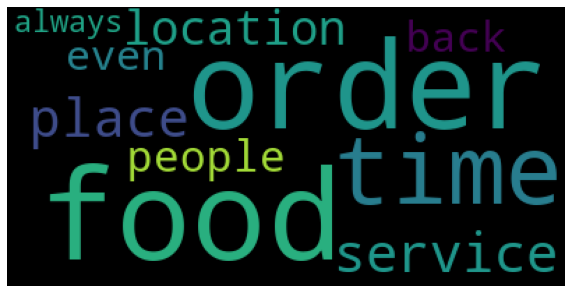

In [58]:
#top 10 keywords 
confirmedText = dfReview['Review_nostop']
a = generateWC(confirmedText, 10)

Customers' concern about location, time and order

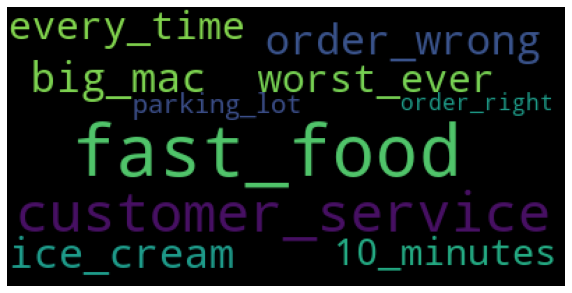

In [63]:
#top 10 bigrams in confirmed text
confirmedTextBigram = generateNGram(dfReview['Review_nostop'], 2)

a = generateWC(confirmedTextBigram, 10)

Some bad comments about time and wrong order and popular foods like ice cream and big mac

### Topic Modeling

In [92]:
#source:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
# Create Dictionary
id2word = corpora.Dictionary(dfReview['Review_nostop_token'])

# Create Corpus
texts = dfReview['Review_nostop_token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

# For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [93]:
#let s try 3 topics 
pprint(lda_model.print_topics()[:3])
doc_lda = lda_model[corpus]

[(0,
  '0.051*"cash" + 0.041*"dirty" + 0.037*"walked" + 0.037*"things" + '
  '0.032*"table" + 0.031*"everyone" + 0.027*"corporate" + 0.023*"talk" + '
  '0.023*"mile" + 0.019*"consistently"'),
 (1,
  '0.057*"zero" + 0.050*"trash" + 0.025*"pack" + 0.014*"burritos" + '
  '0.013*"main" + 0.009*"fried" + 0.007*"hearing" + 0.007*"claimed" + '
  '0.004*"darn" + 0.003*"chewy"'),
 (2,
  '0.016*"highway" + 0.015*"question" + 0.000*"female" + 0.000*"goes" + '
  '0.000*"ξmaybe" + 0.000*"mcflurry" + 0.000*"starts" + 0.000*"magazine" + '
  '0.000*"ξdrivethru" + 0.000*"entrance"')]


1st Topic:
no clue about that. A signal to fine tune text more
    
2nd Topic:
something related to zero and burritos? perhaps can make a set out of those choices
    
3rd Topic
drivethru + mcflurry + female? perhaps mcflurry is still popular for female customers who use drivethru